In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import datetime
import os
%matplotlib inline

sns.set()
import warnings
warnings.filterwarnings('ignore')
os.getcwd()


'c:\\Users\\navee\\Downloads'

In [2]:
os.chdir('C:\\Users\\navee\\Downloads\\archive')
df=pd.read_csv("creditcard.csv")

In [3]:
df.sample(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
237363,149208.0,-0.453199,0.525236,0.547266,-0.673707,0.526678,-0.074530,0.742508,0.022181,0.080003,...,0.214695,0.752032,-0.318148,0.818985,-0.029396,0.171170,0.017400,0.127097,35.00,0
4845,4347.0,-0.899298,2.440693,-2.448413,1.921154,-0.016421,-2.078849,0.858760,-0.069805,1.563645,...,-0.414746,-0.322994,0.381159,0.508449,-0.280727,-0.453073,0.460119,0.271850,90.83,0
160729,113586.0,2.009409,-0.379969,-0.587102,0.132956,-0.323686,-0.161340,-0.544623,-0.063087,0.912429,...,0.175103,0.626316,0.161260,0.556681,-0.259864,0.628995,-0.036992,-0.038956,25.00,0
243393,151916.0,-5.488032,3.329561,-5.996296,3.601720,-2.023926,-1.737393,-4.396859,0.228394,-1.675884,...,1.719631,0.343209,0.133584,0.833340,-0.839776,0.502010,-1.937473,1.521218,0.01,1
154357,101269.0,-0.562426,0.708259,-2.058688,-0.792610,1.568635,-1.265173,1.984695,-0.928365,1.008125,...,0.314505,1.716490,0.210915,-0.428201,-1.048406,0.032429,-0.218303,0.248874,75.00,0
208448,137125.0,2.222512,-0.722811,-1.321348,-0.858075,-0.686069,-1.462076,-0.340690,-0.403150,-0.444040,...,0.427331,1.227185,-0.006059,0.091939,0.182621,0.067891,-0.043021,-0.066557,15.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()  # No missing values.
           #non object df types, no encoding required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Check for duplicate entries
if df.duplicated().any():
    print("Duplicates exist")
else:
    print("Duplicates do not exist")

Duplicates exist


In [7]:
# select the elements that are duplicates
duplicate_elements = df.duplicated()[df.duplicated() == True]

print("No of duplicate entries:",len(duplicate_elements.index))

print('\n\n')

# print the indices of the true elements
print("Indices of duplicate elements:")
print(list(duplicate_elements.index))


No of duplicate entries: 1081



Indices of duplicate elements:
[33, 35, 113, 114, 115, 221, 223, 1178, 1180, 1382, 1384, 1684, 1686, 2004, 2005, 2006, 2728, 2729, 2731, 2732, 2734, 2735, 2784, 2786, 2998, 3000, 3175, 3177, 3316, 3318, 3321, 3323, 4900, 4902, 5925, 5927, 6411, 6412, 6413, 9027, 9028, 9029, 11132, 11134, 12393, 12394, 12395, 13563, 13564, 13565, 13882, 13883, 13884, 16391, 16393, 17949, 17950, 17951, 18051, 18052, 18053, 18263, 18265, 19617, 19619, 19636, 19638, 19797, 19799, 20418, 20420, 21252, 21254, 21403, 21405, 21676, 21677, 21678, 21683, 21684, 21685, 21966, 21967, 21968, 22476, 22478, 22789, 22791, 23891, 23892, 23893, 24965, 24967, 24992, 24994, 25460, 25461, 25462, 25692, 25694, 26943, 26944, 26946, 26947, 26949, 26950, 27402, 27404, 27776, 27777, 27778, 28543, 28544, 28546, 28547, 28549, 28550, 28644, 28646, 29595, 29597, 30136, 30138, 30671, 30673, 30680, 30682, 31637, 31639, 31848, 31850, 31854, 31856, 31983, 31985, 32955, 32957, 34893, 34929, 34931, 35905,

In [8]:
duplicate_rows = df.duplicated(keep=False)

# print the original and duplicate rows
print(df[duplicate_rows])

            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [9]:
print(df[duplicate_rows].index) #1854 here denotes there are in total 1854 rows  
                                #which make up original and duplicate rows both 

Int64Index([    32,     33,     34,     35,    112,    113,    114,    115,
               220,    221,
            ...
            282986, 282987, 283482, 283483, 283484, 283485, 284190, 284191,
            284192, 284193],
           dtype='int64', length=1854)


In [10]:
duplicate_rows = df.duplicated(keep='first') 


print(df[duplicate_rows])  # 1081 repeptitions

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [11]:
df.drop_duplicates(keep='first', inplace= True) # Drop all duplicate rows

In [12]:
df.info() # No object type df. No encoding required. 
         # 284807-1081= 283726 rows which can be verified below

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


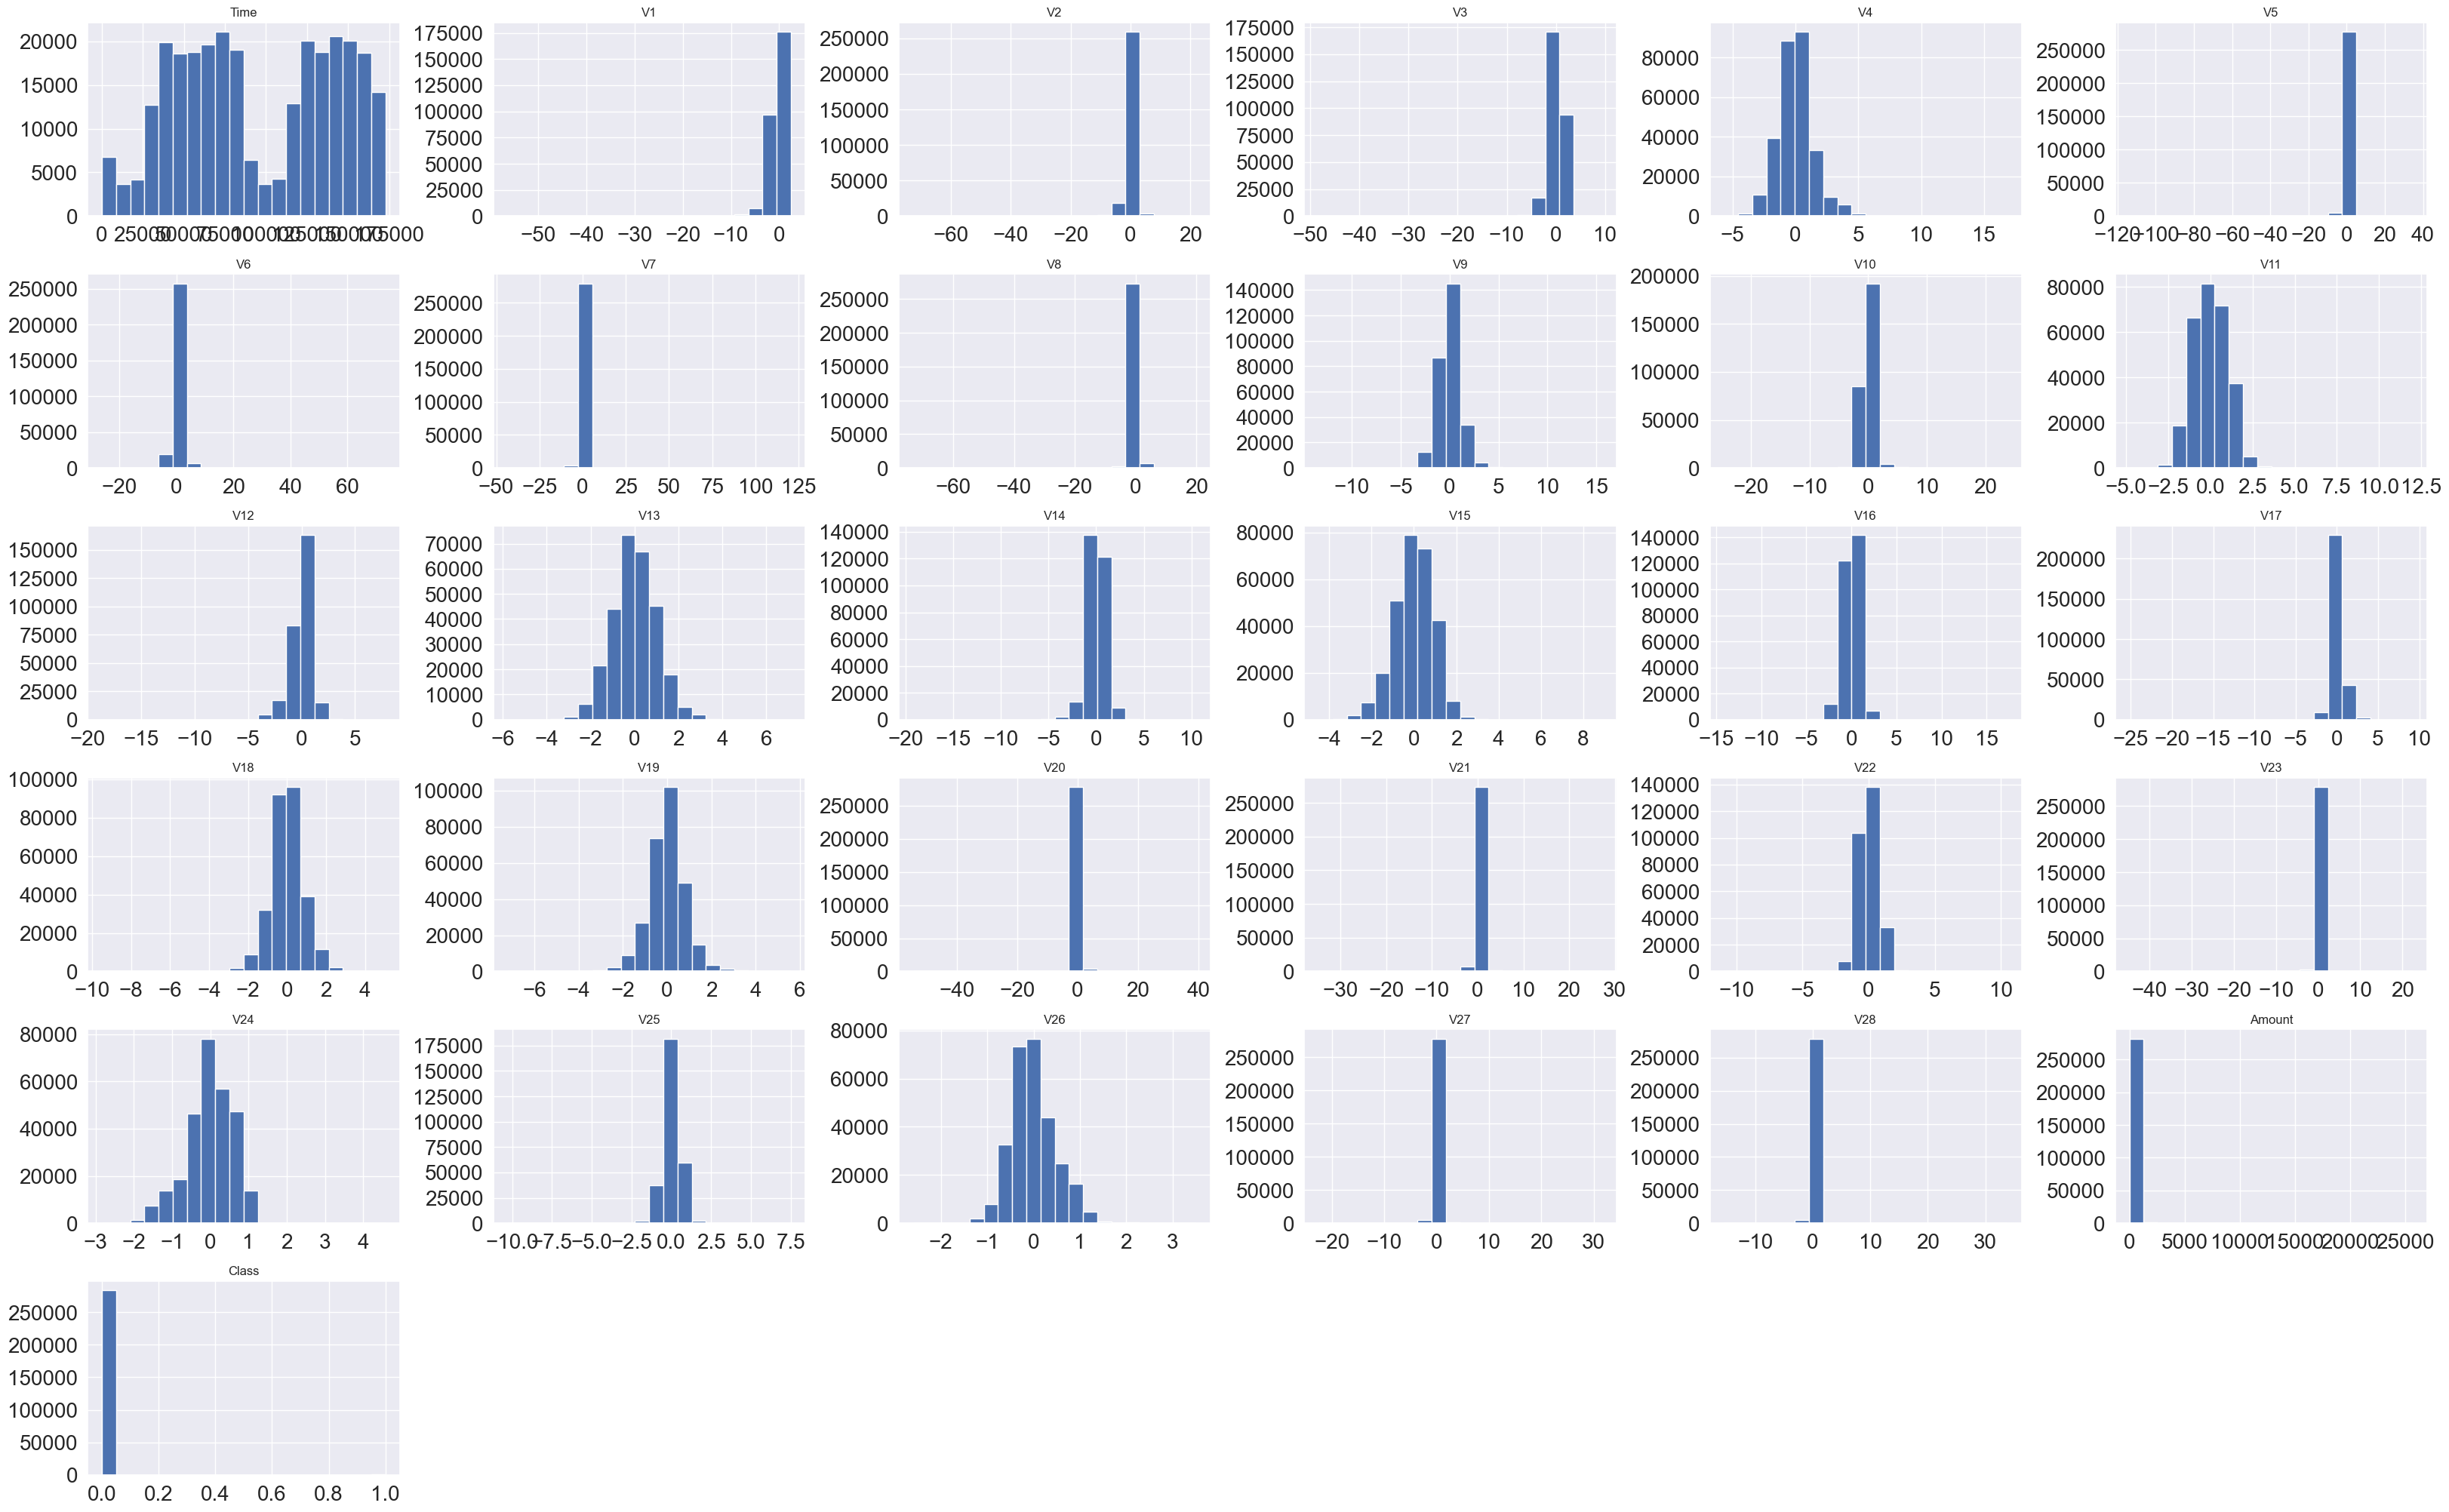

In [14]:
df.hist(xlabelsize=20,ylabelsize=20,bins=20,figsize=(40,25))
plt.subplot
plt.show()

<AxesSubplot: >

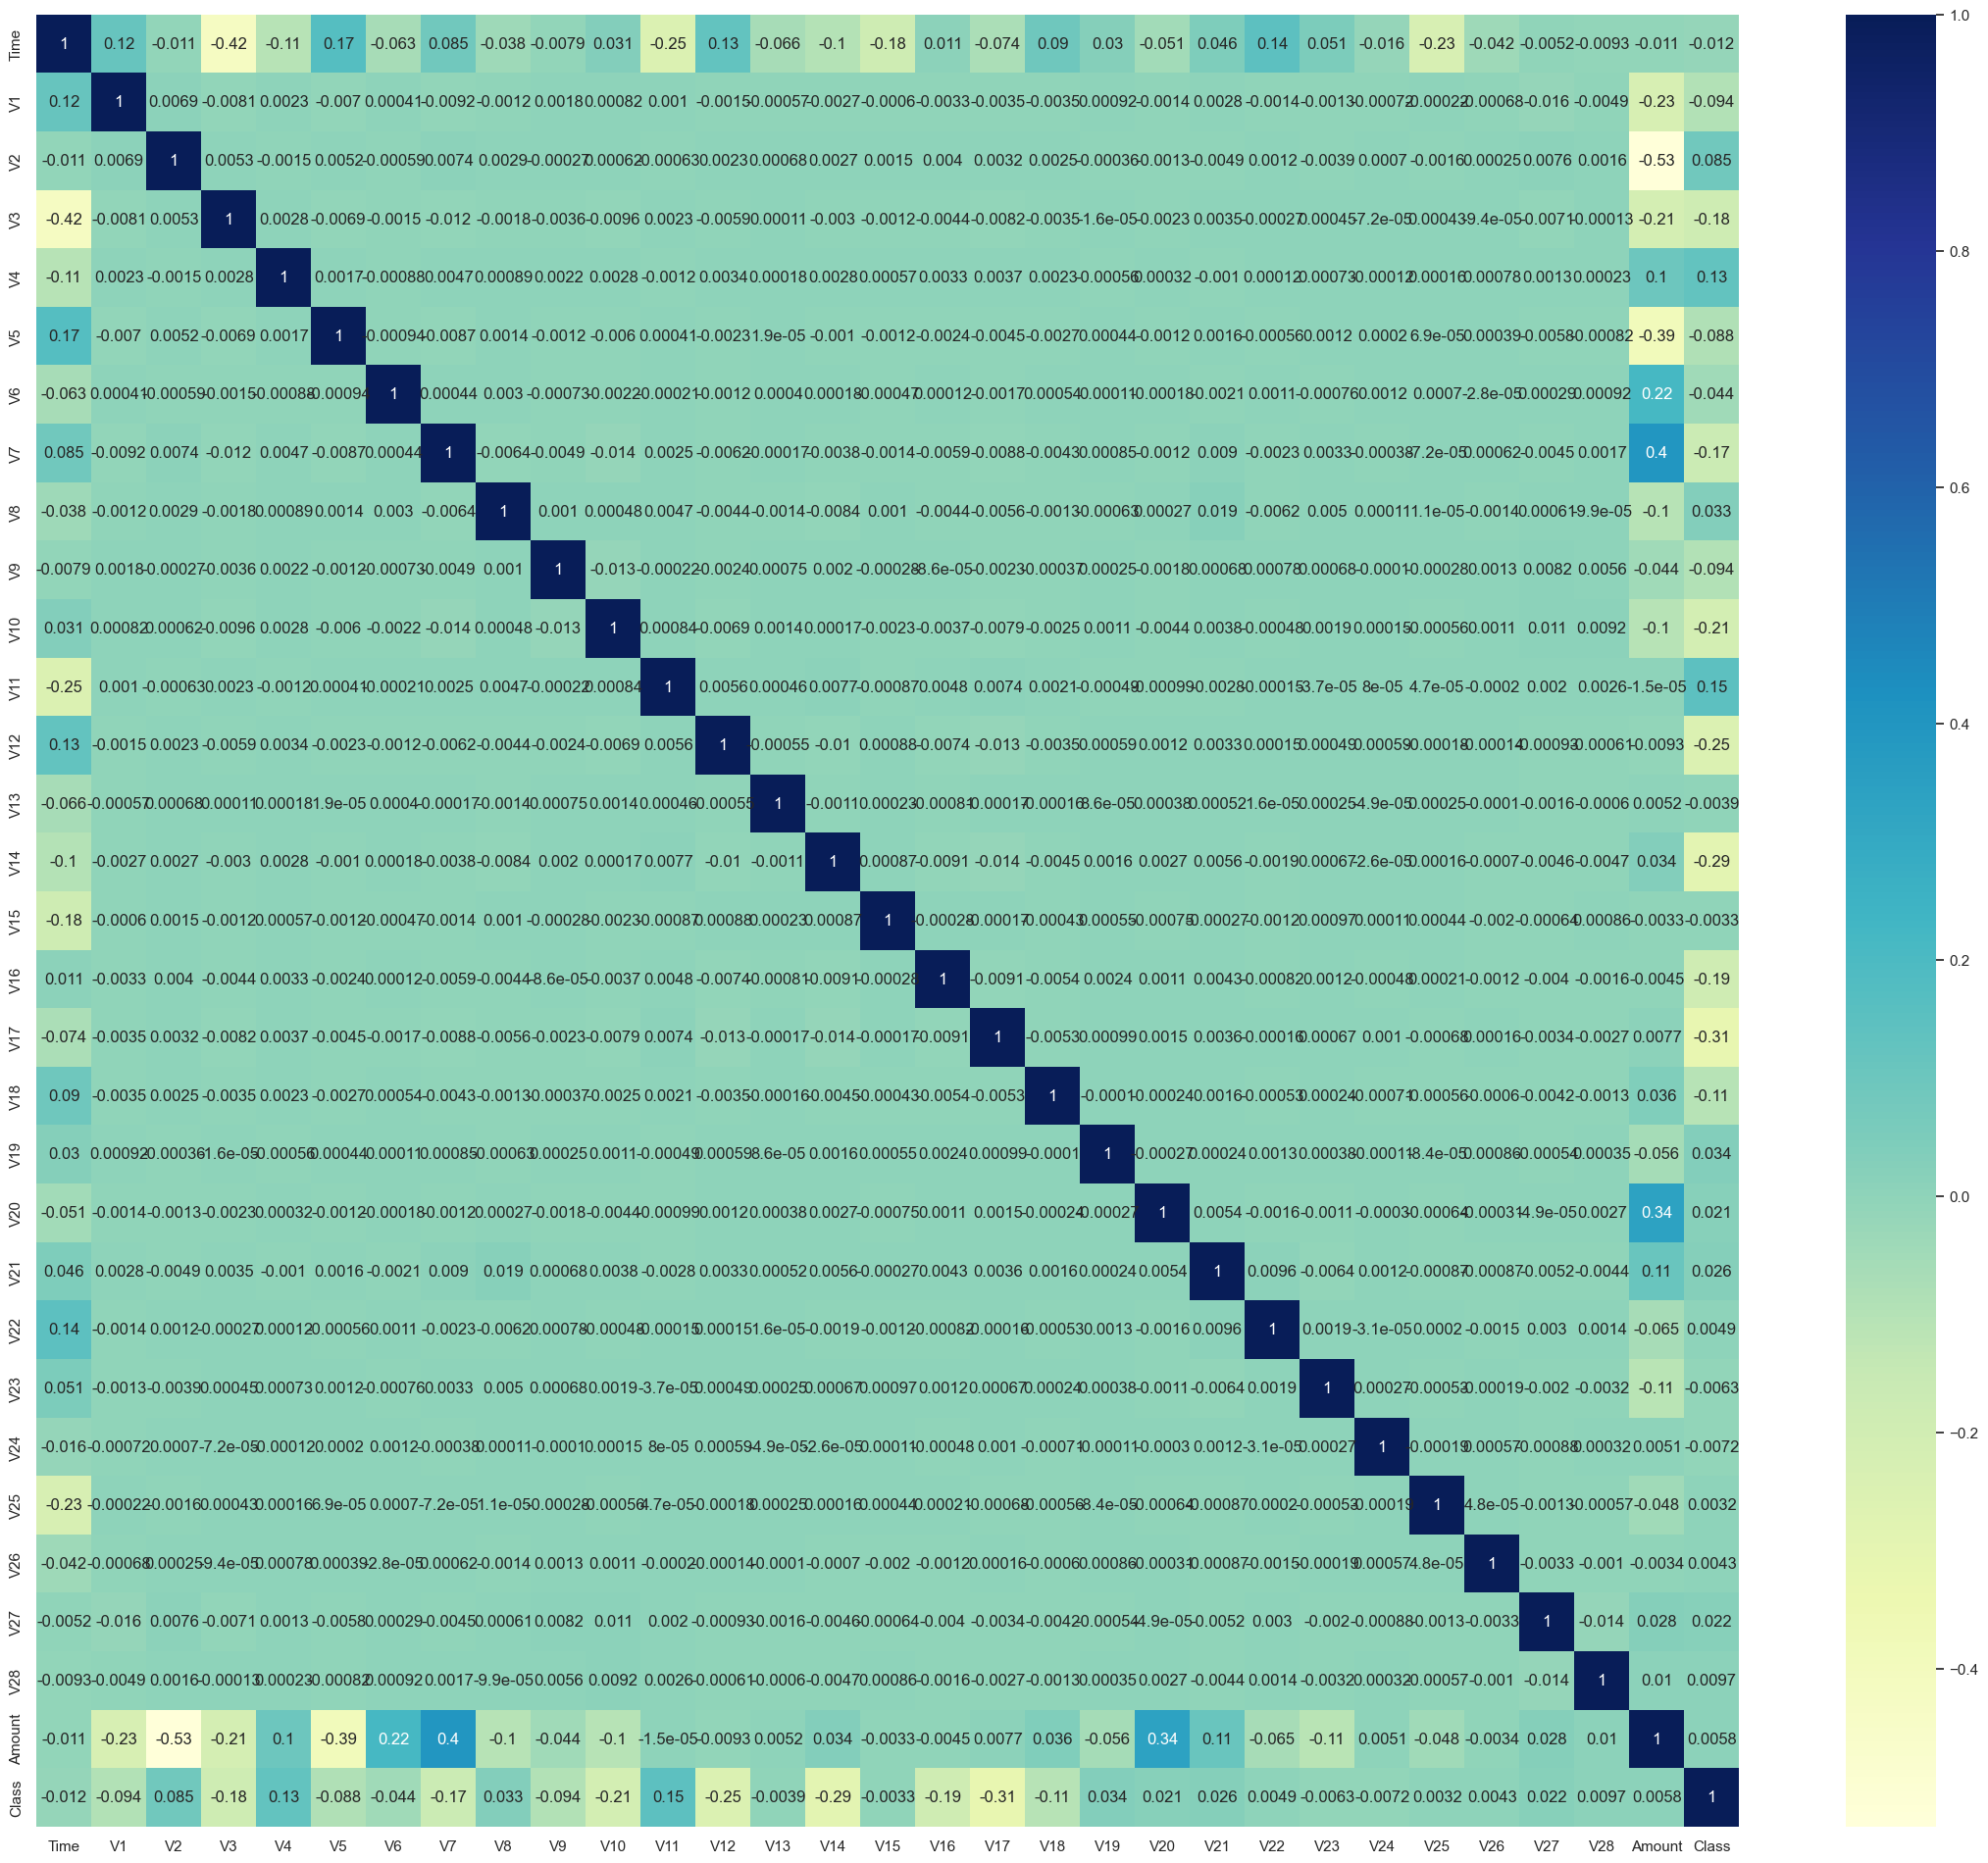

In [16]:
plt.figure(figsize=(28,24))
sns.heatmap(df.corr(), annot=True,cmap ='YlGnBu')  # no multicollinearity between variables


In [17]:
#Correlation of target variable with other variables in descending order.
df.corr()['Class'].abs().sort_values(ascending = False)

Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
Name: Class, dtype: float64

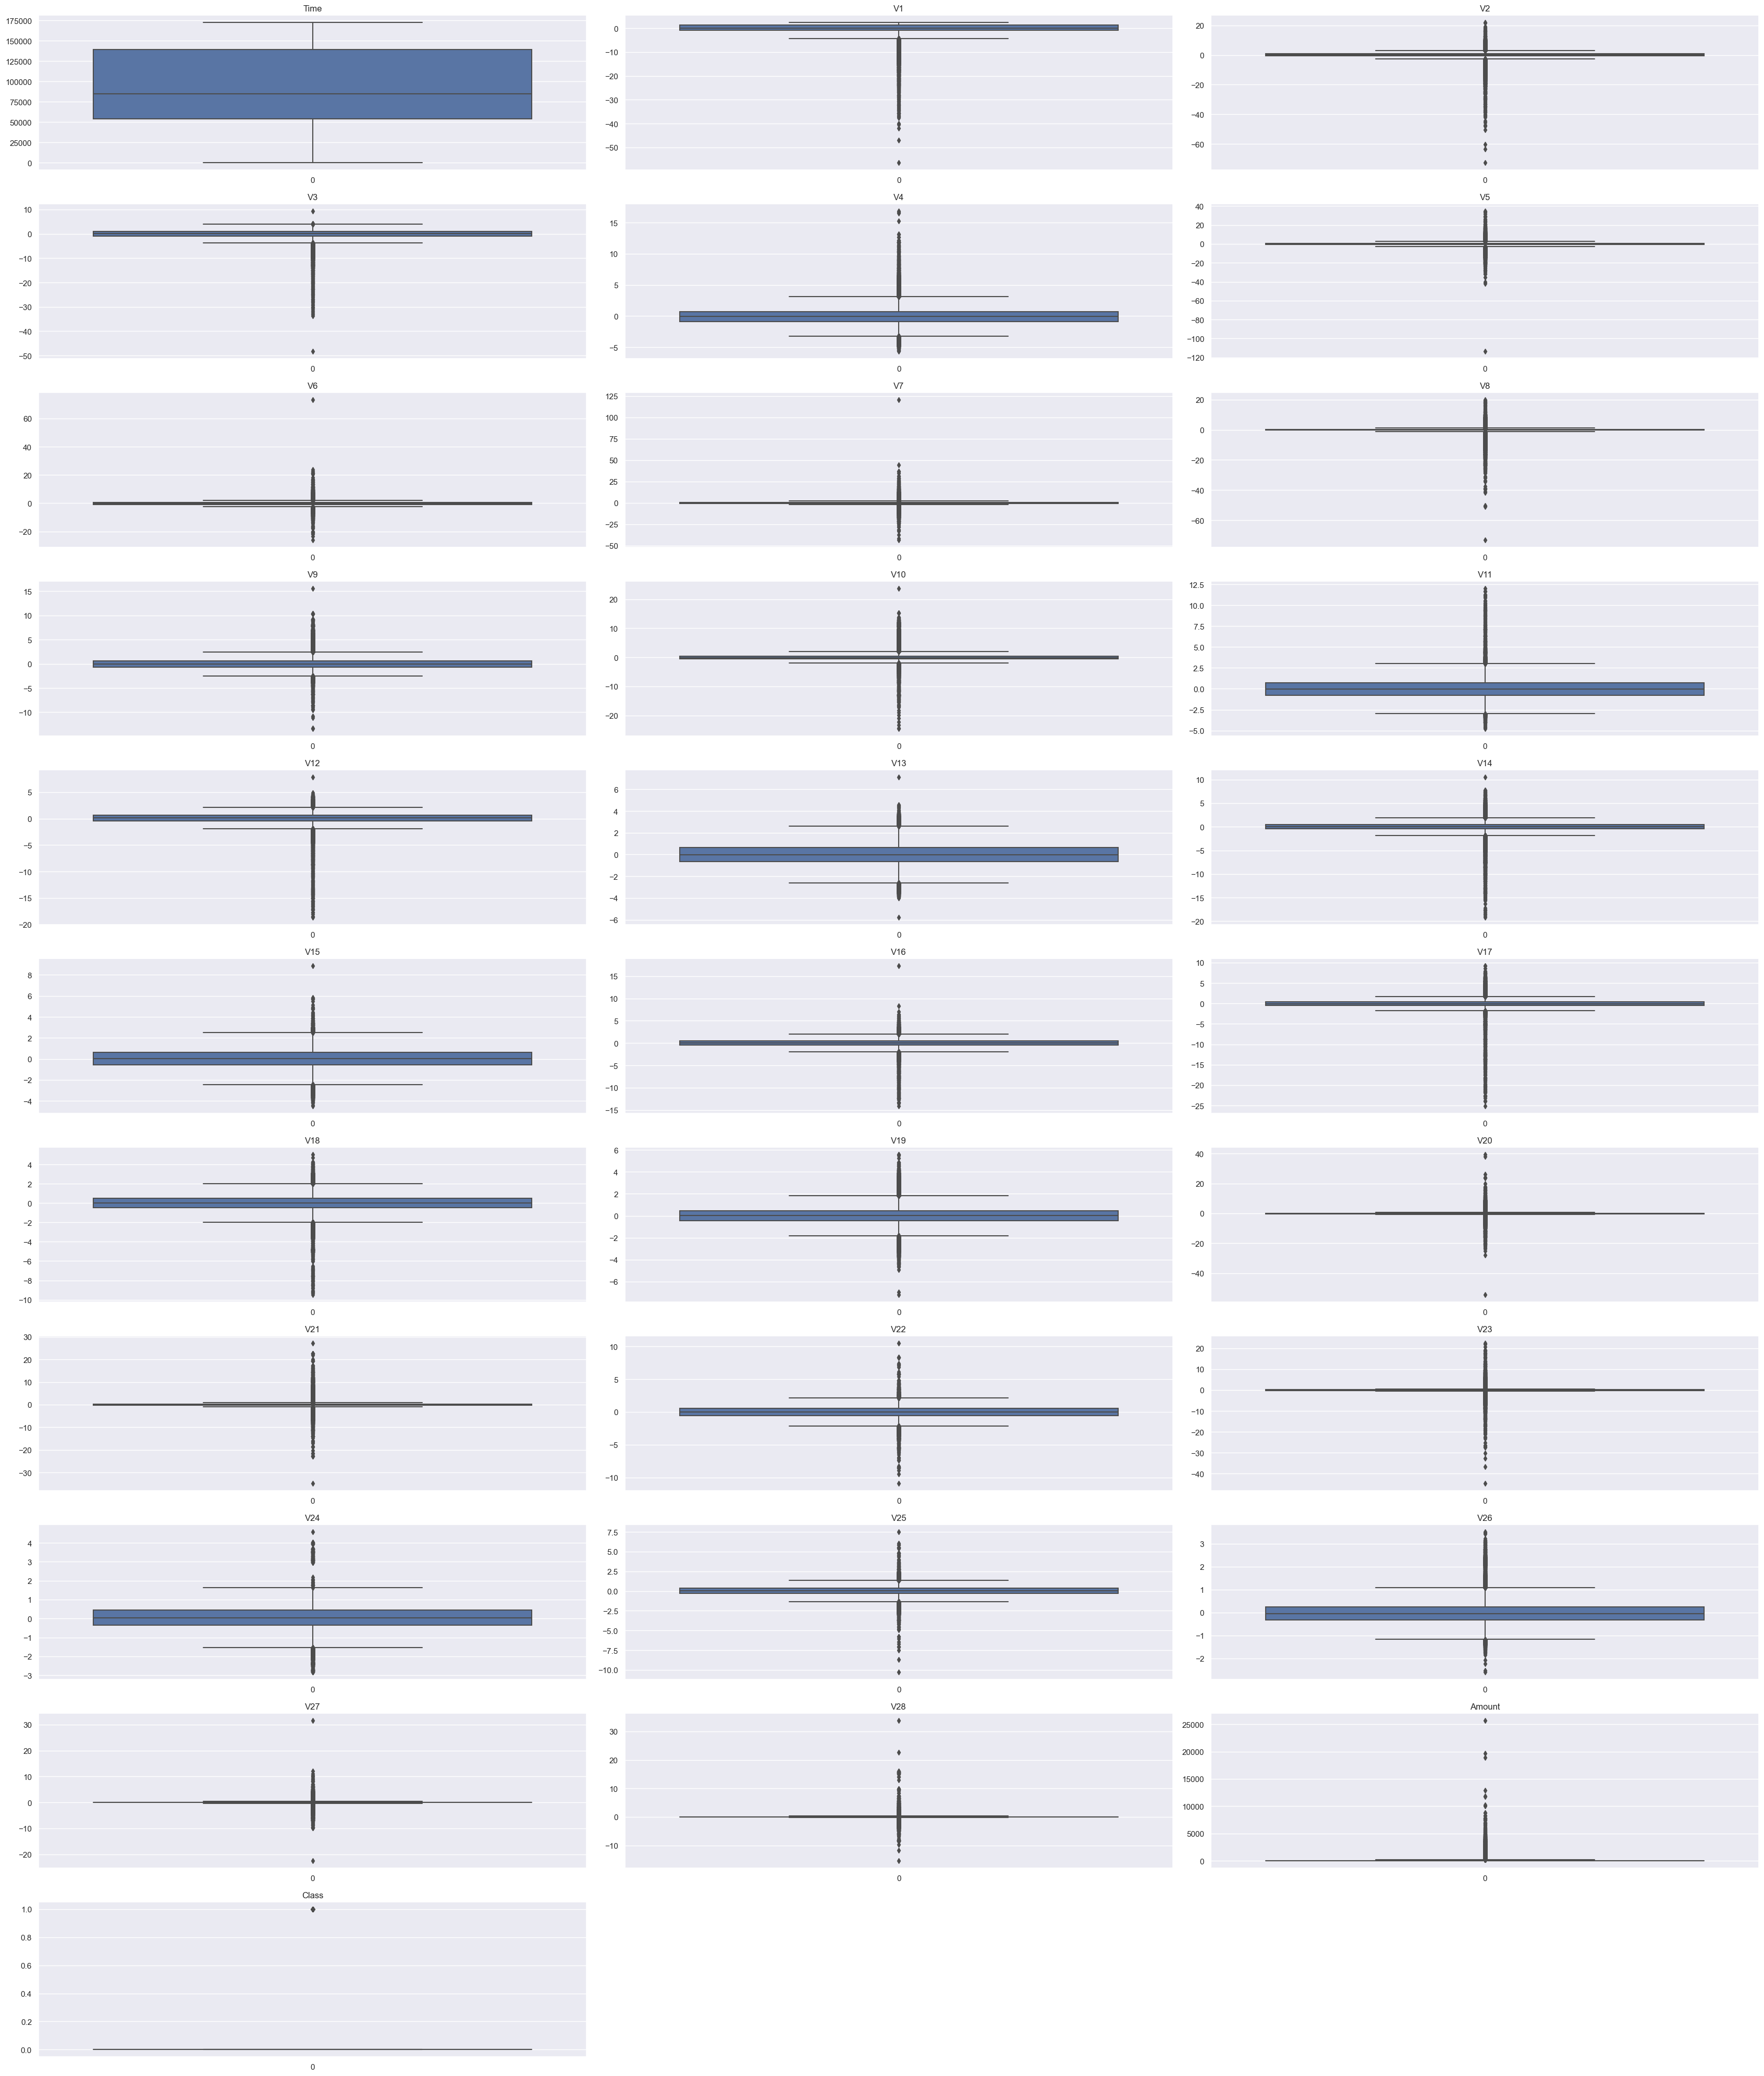

In [18]:
plt.figure(figsize=(34,40)) #Outliers found but we don't treat them as it might lead to information loss

for i, col in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.boxplot(df[col])
    plt.title(col)

    
plt.tight_layout()
plt.show()


In [19]:
df['Class'].value_counts() # Imbalance dfset

0    283253
1       473
Name: Class, dtype: int64

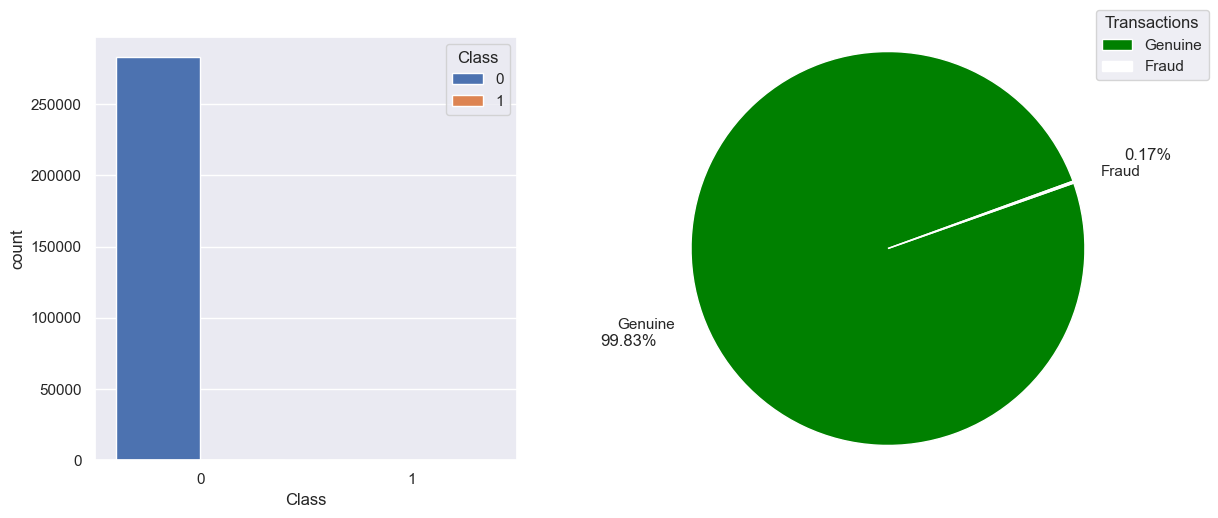

In [20]:
fig = plt.figure(figsize=(12,5.5))
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(x=df['Class'],df=df,saturation=1,hue='Class')



ax2 = fig.add_subplot(1, 3, 3)
plt.pie(df['Class'].value_counts(),labels=['Genuine','Fraud'],radius=1.8,colors = ['green','white'],
    autopct='%1.2f%%',pctdistance=1.4 ,labeldistance=1.15,startangle = 20,)

plt.legend(title = 'Transactions',loc='upper right', bbox_to_anchor=(1.7,1.4))
plt.show()


In [21]:
x=df.drop('Class',axis=1)
y=df['Class']

In [22]:
import imblearn

In [23]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=56)
x_us, y_us = rus.fit_resample(x, y)

In [24]:
x_us  # 946 rows. Hence undersampled dfset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,61257.0,1.391129,-0.592264,0.163820,-0.896281,-0.585921,-0.101239,-0.658089,0.024430,-0.641307,...,0.061876,-0.119494,-0.490399,0.053629,-0.794980,0.244874,-0.399743,0.018886,0.012471,25.00
1,143084.0,-5.999928,4.632263,-3.022861,-0.697768,-3.767956,-1.090980,-3.250612,4.426546,0.432153,...,0.075919,0.347505,0.536849,0.260567,0.003616,0.619255,0.696193,0.056990,0.076850,12.34
2,161976.0,0.746078,-3.011702,-2.362927,-0.169686,-0.766432,0.076161,0.564271,-0.324009,-0.998748,...,0.984498,0.339878,-0.159781,-0.557488,0.303604,-0.291162,0.694320,-0.204391,0.057814,749.00
3,119015.0,2.043972,-0.231360,-1.241907,0.225305,-0.041194,-0.704059,-0.035254,-0.071177,0.553603,...,-0.302612,-0.281290,-0.791507,0.298208,-0.450834,-0.331542,0.207993,-0.085813,-0.077393,2.68
4,129831.0,2.051472,0.361497,-2.449922,0.748498,0.831943,-0.852806,0.242335,-0.266052,0.606275,...,-0.049987,-0.032481,0.236026,-0.060238,0.356577,0.291449,0.706226,-0.037281,-0.005672,12.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
942,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
943,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
944,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [25]:
y_us

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64

In [26]:
y_us.value_counts()  # Balanced undersampled dfset

0    473
1    473
Name: Class, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_us, y_us, test_size = 0.25)

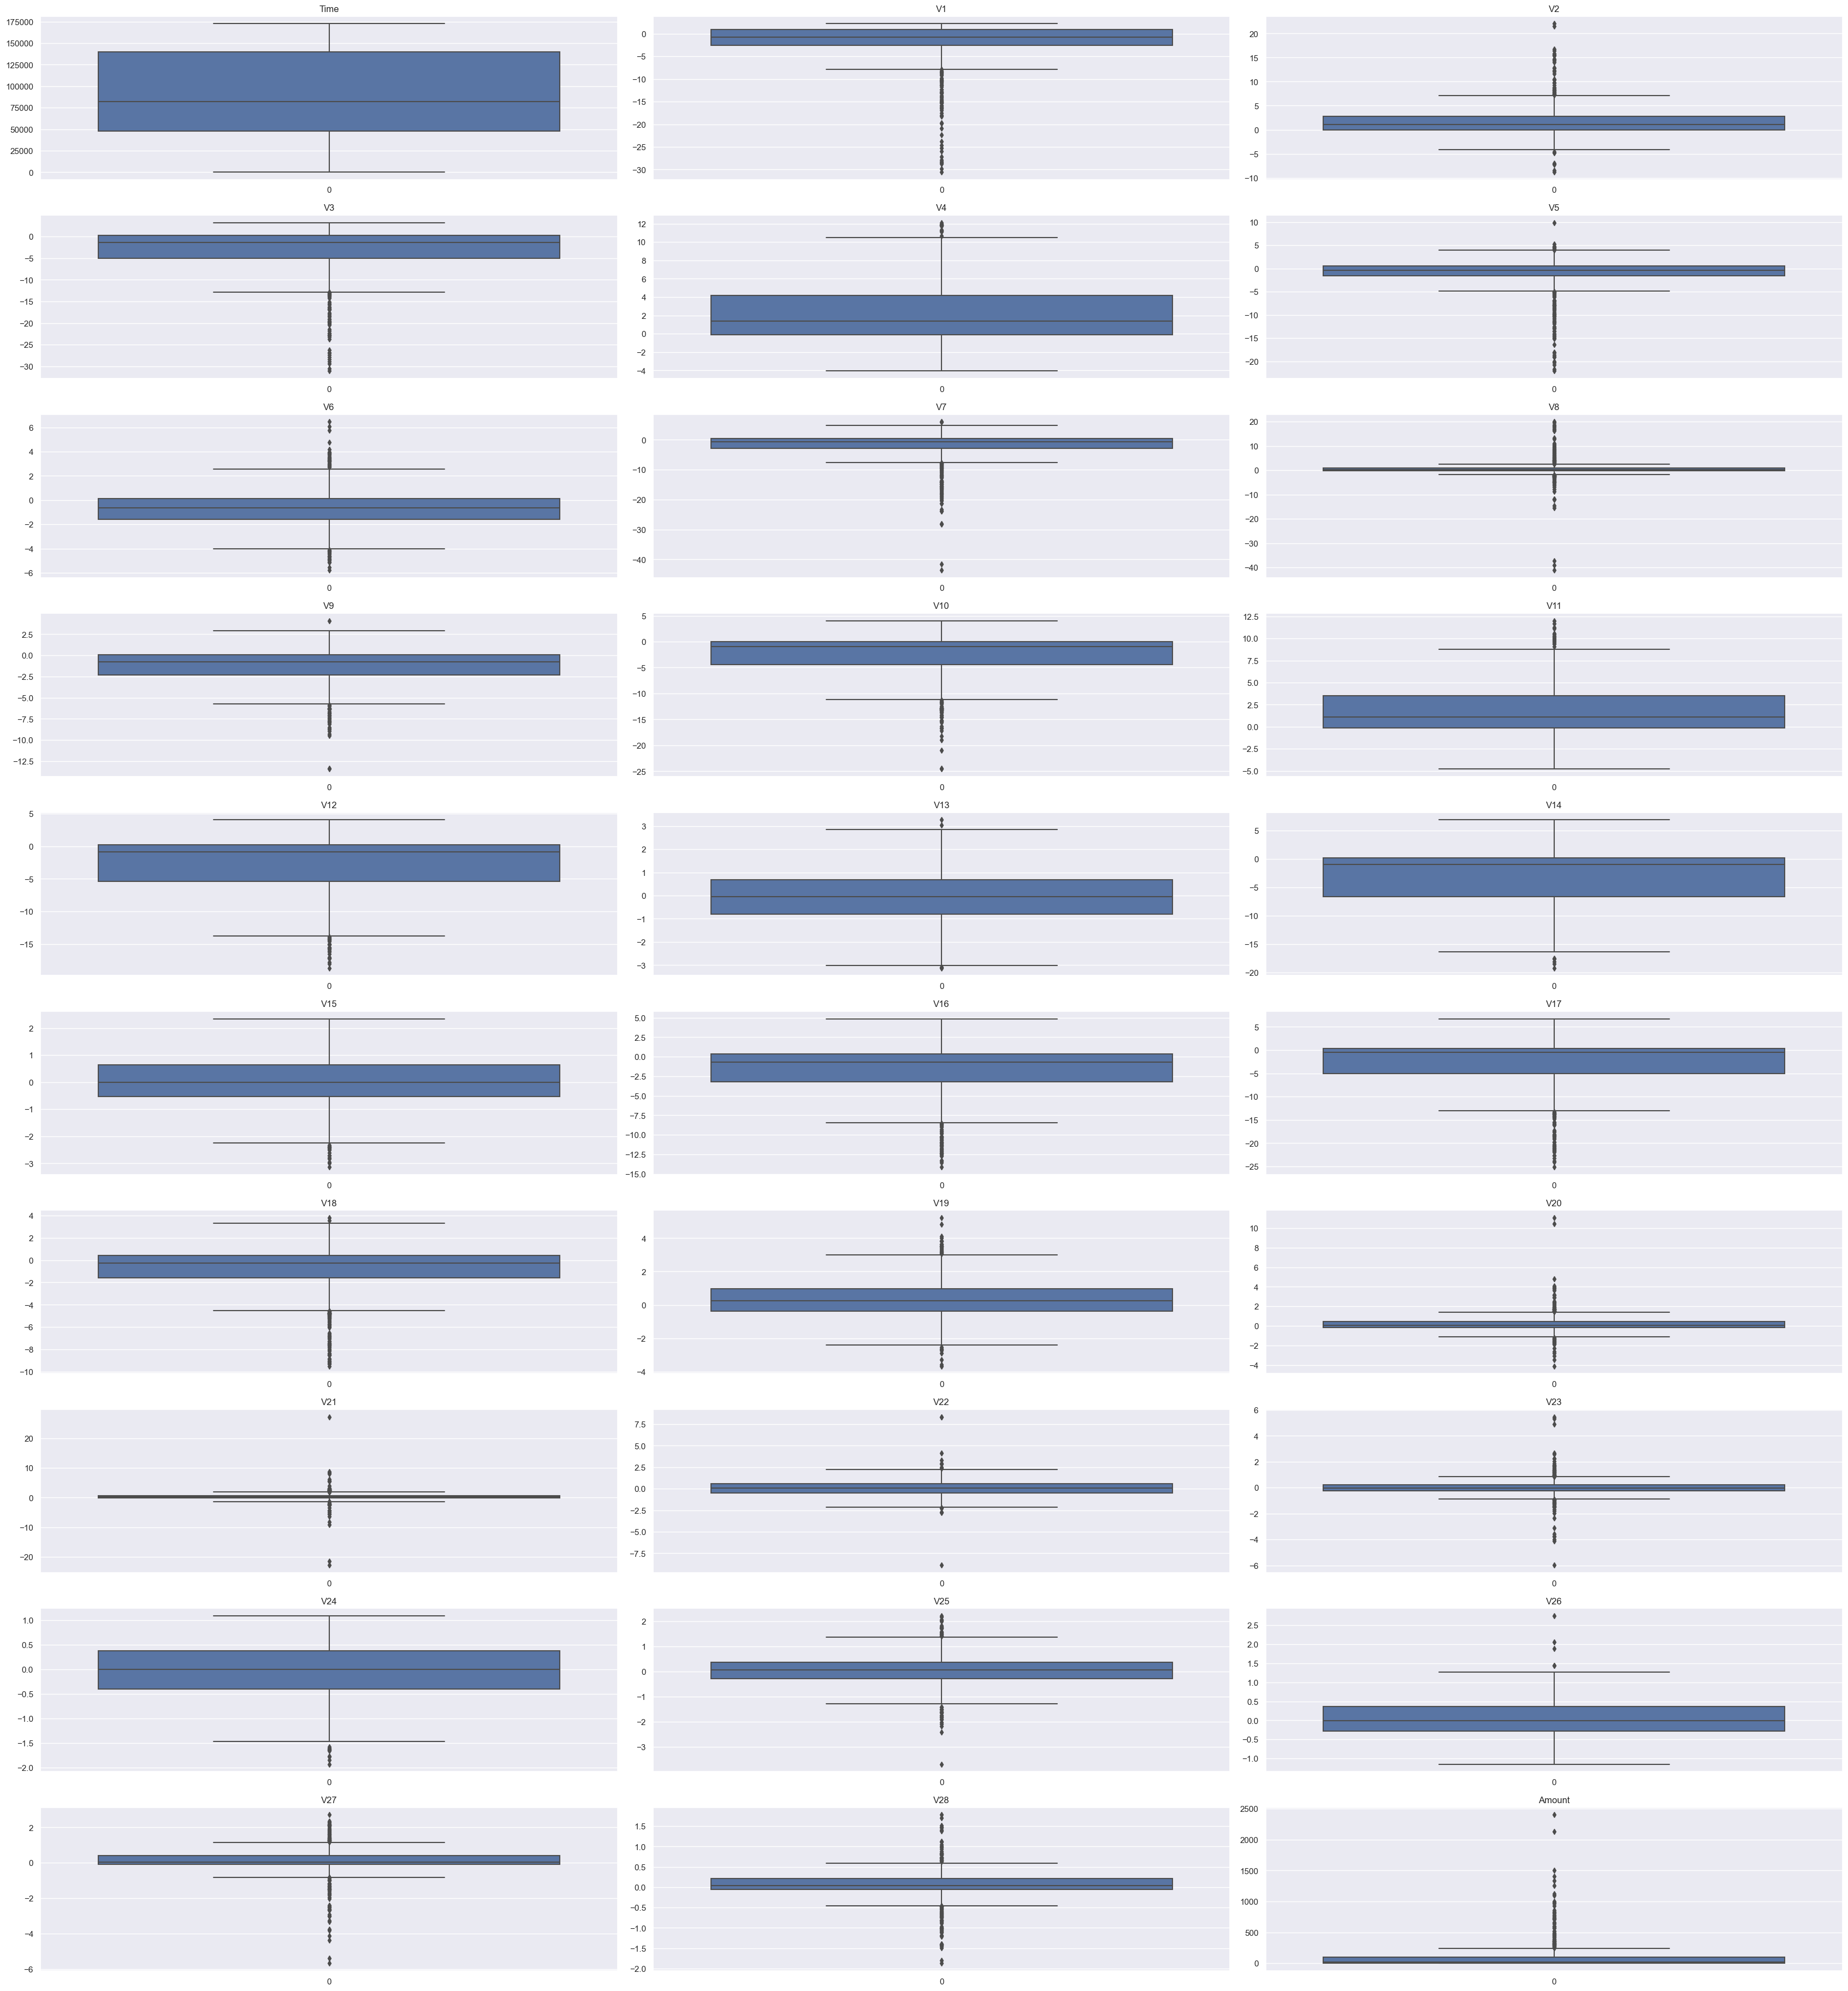

In [28]:
plt.figure(figsize=(34,40))    # Outliers exist in df

for i, col in enumerate(x_train.columns):
    plt.subplot(11, 3, i+1)
    sns.boxplot(x_train[col])
    plt.title(col)

    
plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

In [30]:
x_train_sd = sd.fit_transform(x_train)

In [31]:
x_train_sd

array([[-1.46029049, -2.00703954,  0.84343378, ...,  1.30447483,
        -4.75772904,  0.35974025],
       [ 1.00299198,  0.3098484 , -0.14909809, ...,  0.03026877,
         0.57066875, -0.44311668],
       [ 0.136479  , -3.11629398,  3.36411618, ..., -3.88357194,
        -1.45088858, -0.43251747],
       ...,
       [-1.16066468, -0.03625514, -0.24730888, ..., -0.95336492,
         0.2323234 , -0.17919203],
       [-0.96458482,  0.2029348 , -0.26309084, ...,  0.38281024,
         0.08956833,  0.42786544],
       [-1.0012442 , -1.35009576,  1.4828835 , ...,  0.50803615,
        -1.23196312,  1.54847868]])

In [32]:
df2=pd.dfFrame(x_train_sd)

In [33]:
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.460290,-2.007040,0.843434,-2.319039,2.508512,-2.282699,0.454752,-2.493342,-0.402682,-1.797673,...,-0.287534,-1.170755,1.728365,1.818322,-0.860779,-2.540913,0.208995,1.304475,-4.757729,0.359740
1,1.002992,0.309848,-0.149098,0.449598,-0.627361,0.767068,-0.113609,0.738769,-0.204797,0.316361,...,-0.289907,-0.078984,0.407372,-0.434501,-1.683020,0.378024,-0.962725,0.030269,0.570669,-0.443117
2,0.136479,-3.116294,3.364116,-2.839771,2.902390,-3.182545,0.165950,-4.038094,-1.336059,-3.233095,...,2.236515,-2.262060,2.871254,1.966371,0.789073,-0.395435,0.739666,-3.883572,-1.450889,-0.432517
3,1.538125,-0.713575,-3.035489,0.581527,1.504192,2.822186,-3.056684,-0.633662,0.069563,0.099245,...,2.310362,0.295297,-0.184937,2.956336,1.279138,-2.975660,-0.351110,-0.018189,1.340001,-0.470516
4,0.652601,0.468943,-0.684743,0.477027,-1.609536,0.756933,2.666693,0.339671,0.150101,0.245179,...,0.000500,-0.112611,-0.170479,0.440936,1.267489,-1.048645,-1.204098,-0.042556,-0.088609,-0.167757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,1.077552,0.641384,0.117076,-0.097110,1.025967,0.355651,-0.229934,0.110158,0.019309,-0.329798,...,-0.036668,0.003798,-0.228066,-0.022606,-0.548970,0.266427,0.128164,0.478418,0.533962,-0.466118
705,-0.193415,0.335941,-0.214921,0.786044,-0.554653,0.500572,0.404355,0.815290,-0.402864,0.763704,...,0.063586,-0.204436,0.385731,-0.479274,-0.685648,-0.389033,-0.969909,-0.951963,-1.769222,-0.077994
706,-1.160665,-0.036255,-0.247309,0.612478,-1.290260,0.270624,-0.155653,0.530518,-0.099561,-0.104416,...,-0.505961,-0.235194,-0.885404,-0.286904,-0.044620,0.573046,-1.472166,-0.953365,0.232323,-0.179192
707,-0.964585,0.202935,-0.263091,0.373325,-0.409988,-0.248378,0.307977,0.145381,0.003299,0.172856,...,-0.031251,0.177420,0.806717,0.238830,0.253864,-0.436695,1.339147,0.382810,0.089568,0.427865


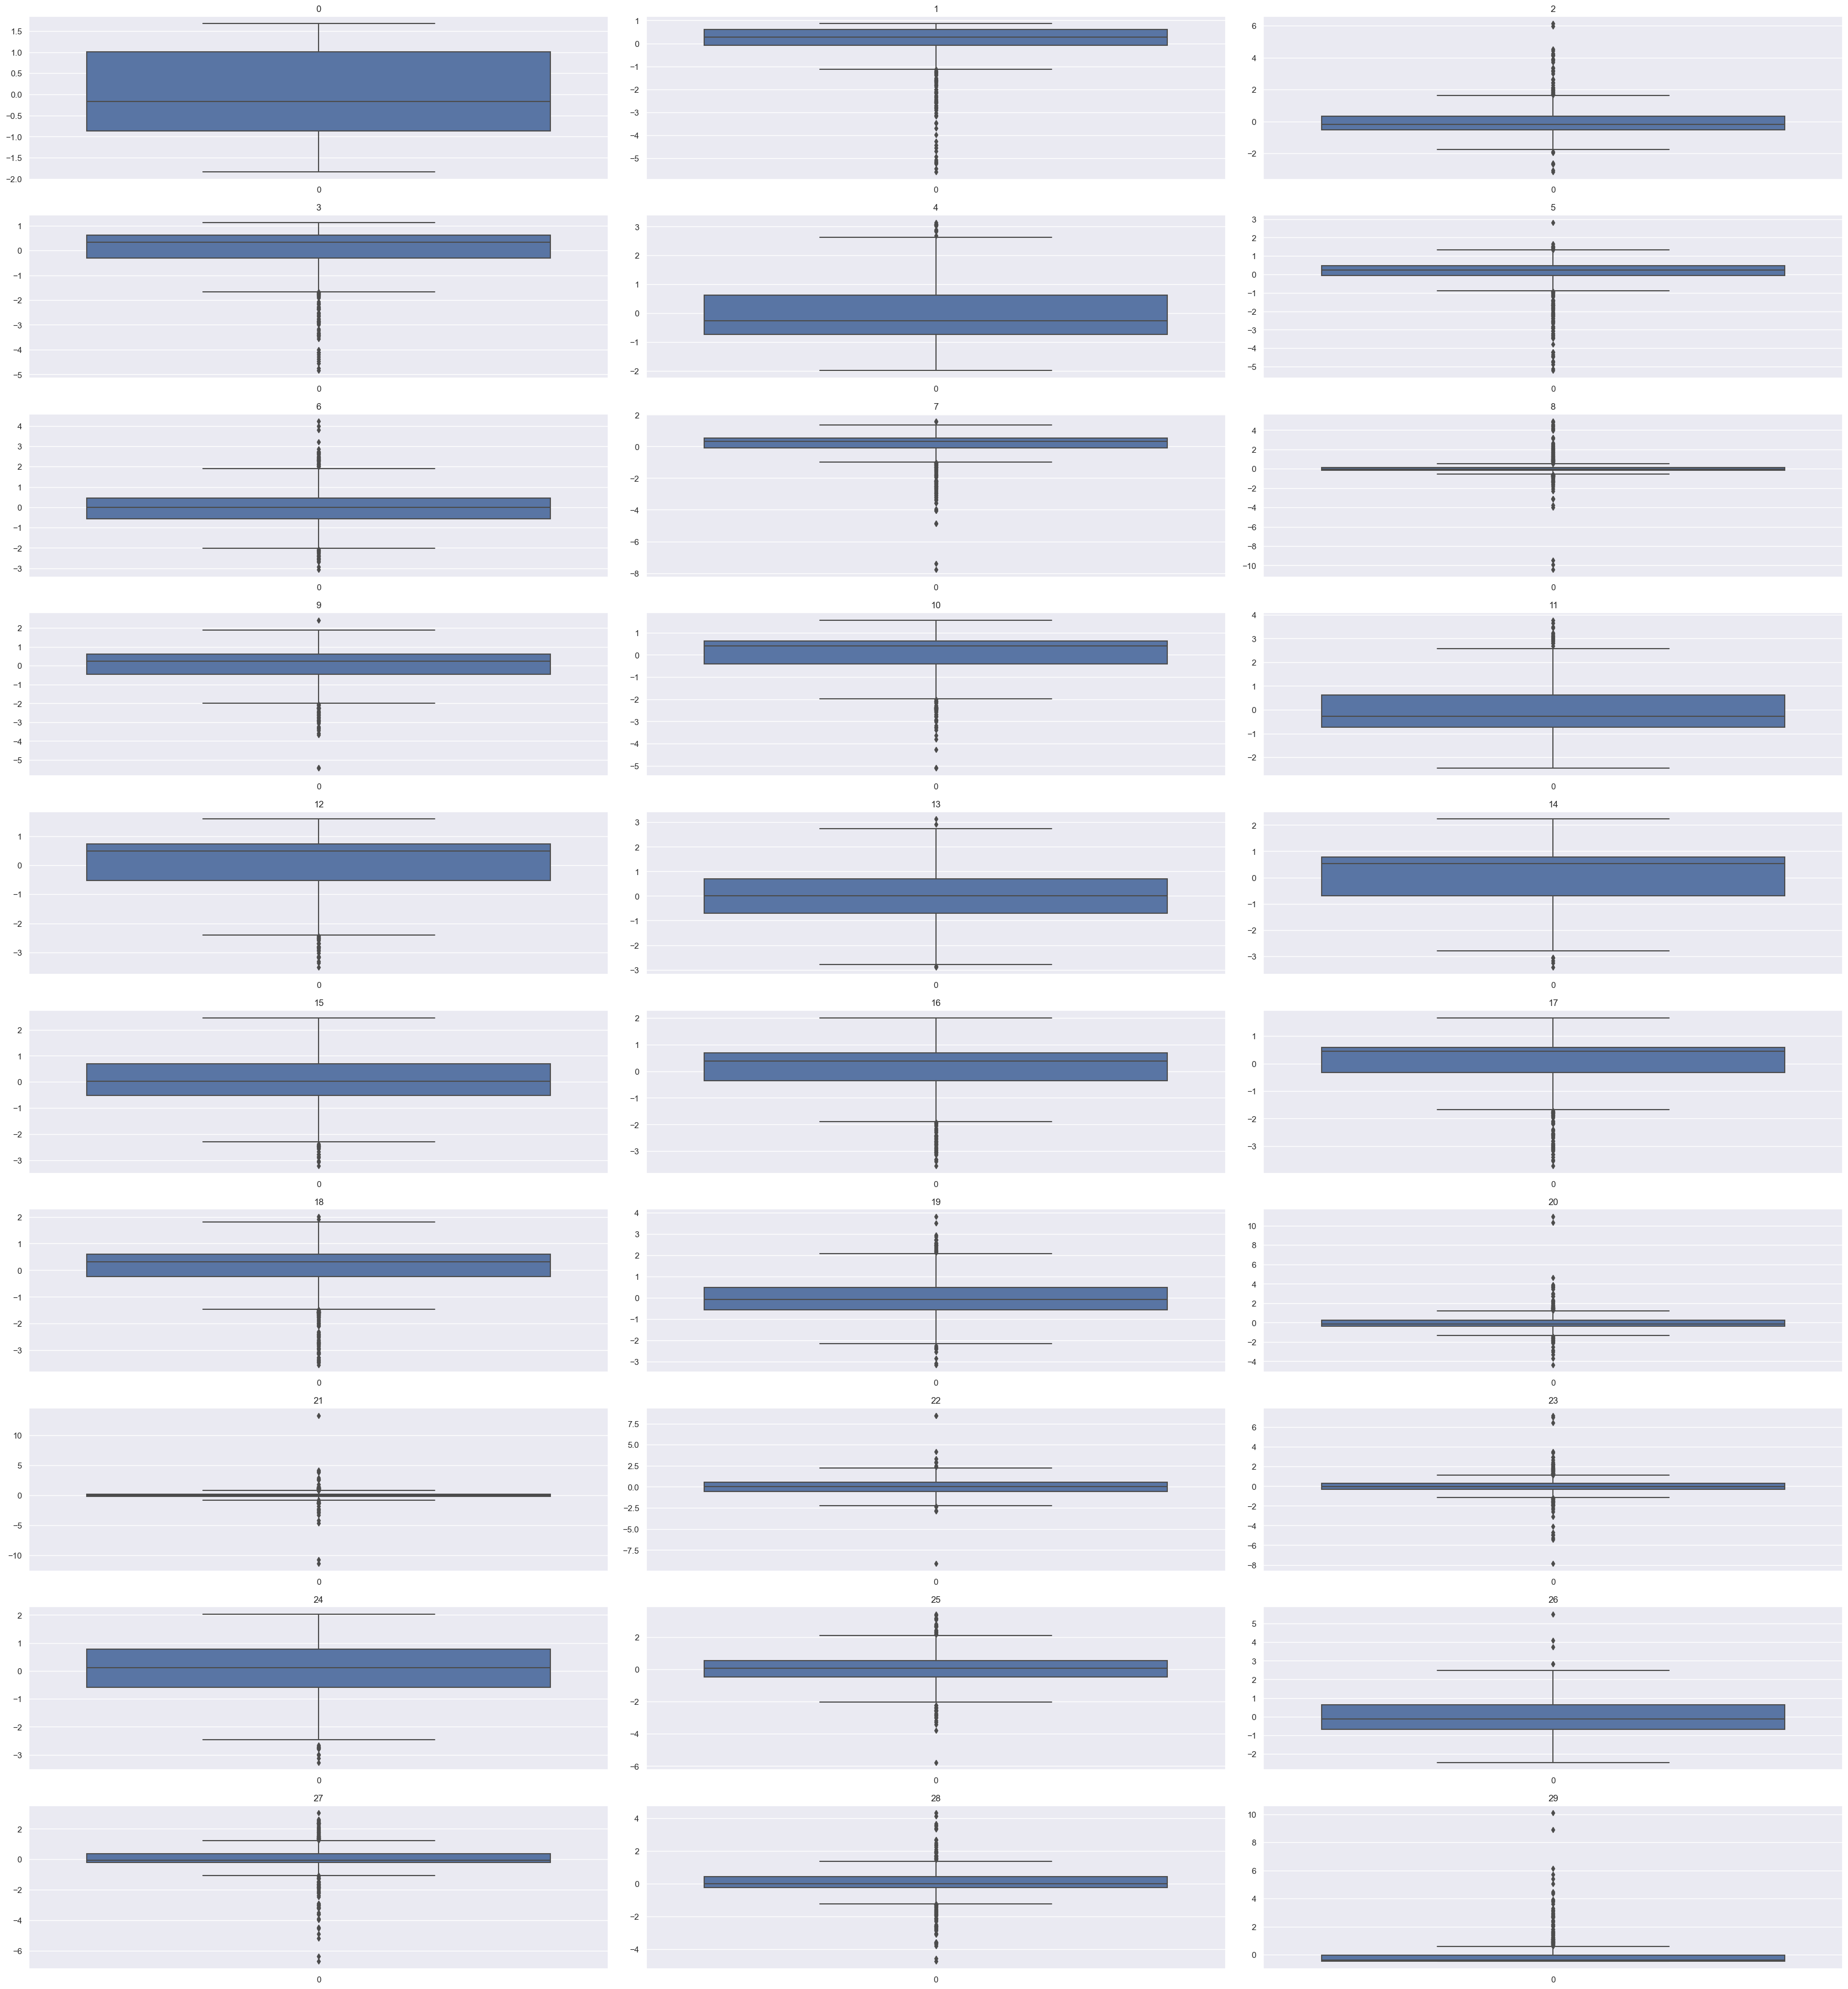

In [35]:
plt.figure(figsize=(34,40))   # Outliers exist but scale has changed. 

for i, col in enumerate(df2.columns):
    plt.subplot(11, 3, i+1)
    sns.boxplot(df2[col])
    plt.title(col)

    
plt.tight_layout()
plt.show()

In [38]:
import seaborn as sns
from scipy.stats import ttest_ind

# Split the df into fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Check the mean of the 'Amount' column for each group
print("Mean of 'Amount' for fraud transactions:", fraud['Amount'].mean())
print("Mean of 'Amount' for non-fraud transactions:", non_fraud['Amount'].mean())

# Perform a two-sample t-test to compare the means of the 'Amount' column for the two groups
t_statistic, p_value = ttest_ind(fraud['Amount'], non_fraud['Amount'], equal_var=False)

# Print the results of the t-test
print("T-statistic:", t_statistic)
print("P-value:", p_value)



Mean of 'Amount' for fraud transactions: 123.87186046511628
Mean of 'Amount' for non-fraud transactions: 88.41357475472456
T-statistic: 2.96133213119579
P-value: 0.0032170245746811887
